## Лабораторная работа 4. Линейные модели, SVM и деревья решений.

Задание:
Выберите набор данных (датасет) для решения задачи классификации или регрессии.
В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
С использованием метода train_test_split разделите выборку на обучающую и тестовую.
Обучите следующие модели:
одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
SVM;
дерево решений.
Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
Постройте график, показывающий важность признаков в дереве решений.
Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#### Загрузка данных и предобработка

In [12]:
# Загрузка данных
df = pd.read_csv('Churn_Modelling.csv')

print(df.head())
print(df.info())

# Удаляем неинформативные столбцы
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Кодирование категориальных признаков
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male: 1, Female: 0

# One-hot encoding для Geography
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Разделение на признаки и целевой признак
X = df.drop('Exited', axis=1)
y = df['Exited']

# Масштабирование данных (для SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

#### Обучение моделей для решения задачи классификации

In [13]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [14]:
# SVM
svm = SVC(kernel='rbf', C=1.5, class_weight='balanced')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [15]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [16]:
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{name}:\nAccuracy: {acc:.4f}, F1 Score: {f1:.4f}\n")
    print(classification_report(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("SVM", y_test, y_pred_svm)
evaluate_model("Decision Tree", y_test, y_pred_dt)

Logistic Regression:
Accuracy: 0.7195, F1 Score: 0.4996

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.38      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.75      2000

SVM:
Accuracy: 0.7860, F1 Score: 0.5779

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1607
           1       0.47      0.75      0.58       393

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.79      0.80      2000

Decision Tree:
Accuracy: 0.7375, F1 Score: 0.5517

              precision    recall  f1-score   support

           0       0.94      0.72      0.81      1607
           1       0.42      0.82      0.55       393

    accuracy                     

#### Важность признаков

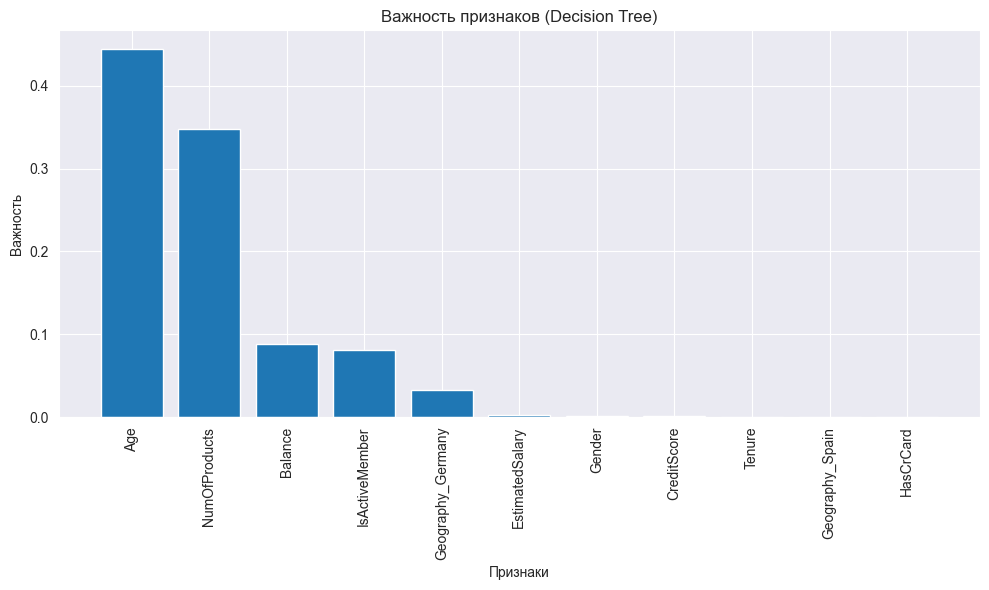

In [17]:
# Важность признаков
importances = dt.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Важность признаков (Decision Tree)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.tight_layout()
plt.show()

#### Дерево решений в текстовом формате

In [18]:
from sklearn.tree import export_text

tree_rules = export_text(dt, feature_names=list(X.columns))
print(tree_rules)

|--- Age <= 0.25
|   |--- NumOfProducts <= 1.67
|   |   |--- NumOfProducts <= -0.05
|   |   |   |--- Geography_Germany <= 0.57
|   |   |   |   |--- Balance <= -0.02
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Balance >  -0.02
|   |   |   |   |   |--- class: 0
|   |   |   |--- Geography_Germany >  0.57
|   |   |   |   |--- Balance <= 0.26
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Balance >  0.26
|   |   |   |   |   |--- class: 1
|   |   |--- NumOfProducts >  -0.05
|   |   |   |--- Balance <= -1.20
|   |   |   |   |--- Gender <= -0.09
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Gender >  -0.09
|   |   |   |   |   |--- class: 0
|   |   |   |--- Balance >  -1.20
|   |   |   |   |--- IsActiveMember <= -0.03
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- IsActiveMember >  -0.03
|   |   |   |   |   |--- class: 0
|   |--- NumOfProducts >  1.67
|   |   |--- Balance <= -0.85
|   |   |   |--- EstimatedSalary <= 0.54
|   |   |   |   |--- Age <= -0.61
|   

#### Визуализация дерева

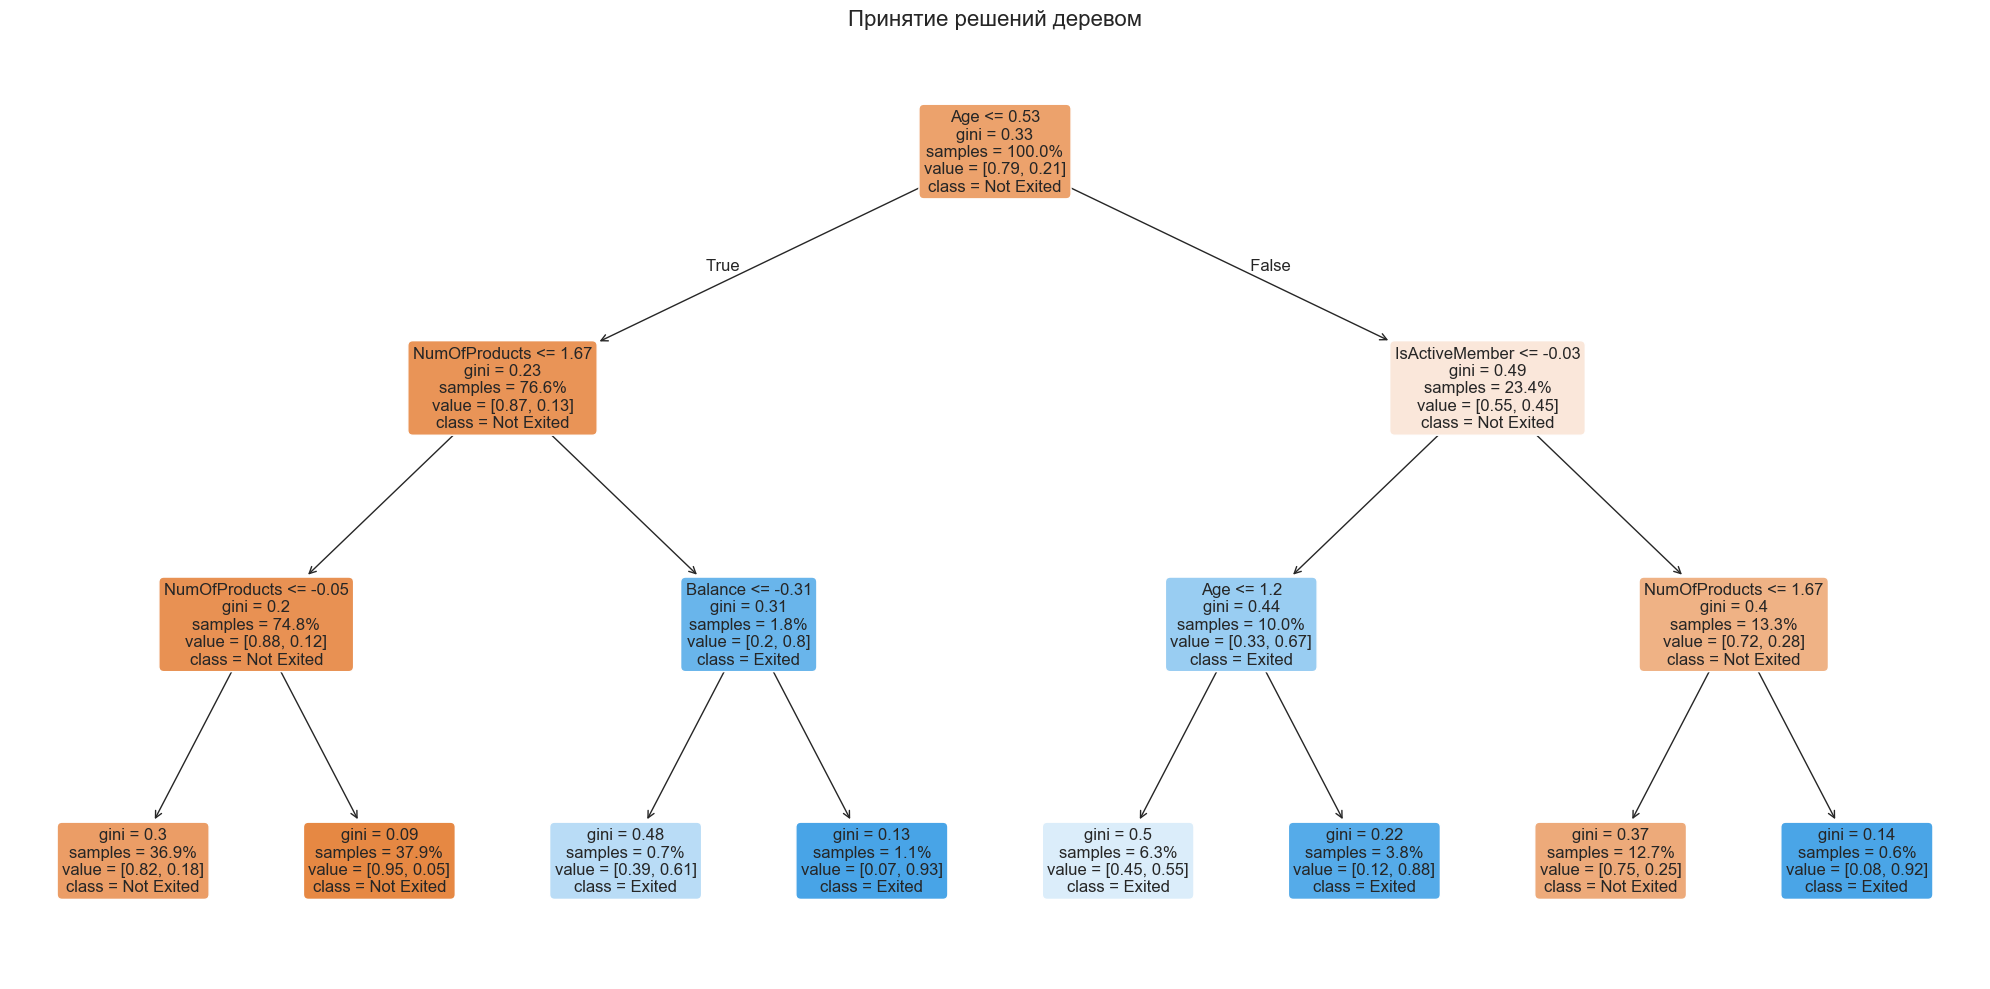

In [19]:
from sklearn.tree import plot_tree, DecisionTreeClassifier

# Обучаем дерево
dt_small = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_small.fit(X_train, y_train)

# Визуализация
plt.figure(figsize=(20, 10))
plot_tree(
    dt_small,
    feature_names=X.columns,
    class_names=["Not Exited", "Exited"],
    filled=True,
    rounded=True,
    fontsize=12,
    impurity=True,
    proportion=True,
    precision=2
)
plt.title("Принятие решений деревом", fontsize=16)
plt.tight_layout()
plt.show()
